# Fraud Alert! Detecting Fraudulent Cedit Card Transactions using Machine Learning in Python
### **SOLUTIONS**
---

## External dependencies - DO NOT MODIFY

In [1]:
dataset_url = 'https://raw.githubusercontent.com/patohdzs/wfs-fintech/main/fraud-alert/creditcard_reduced.csv'

## Notebook Format


*   The notebook is divided into various sections, separated by headers in a larger font size.
*   Each section will have text describing what is being done, hopefully serving both as useful instruction of what to code but also which modelling stage we are incorporating and why.
---
* **Instructions on the tasks will appear separated and in bold font at the end of each piece of text, and the corresponding solution should be written in a cell directly below.**

*   **Sometimes code will already be written in this cell either as an example or to carry out tasks that go beyond the scope of this workshop. In these cases, you should add your code in between the lines commented `#### ADD YOUR CODE HERE ####` and `##############`.**

*   **Exercise: try printing out "Hello World" in the cell below.**


## Step 1: Importing external modules

In [2]:
# Importing NumPy and Pandas libraries - matrix and vector manipulation
import numpy as np
import pandas as pd

# Importing Matplotlib and Seaborn - graphics and visualization
from matplotlib import pyplot as plt
import seaborn as sns

# Importing Scikit Learn modules - Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

# Warning disabling
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning

## Step 2: Download dataset



*   The first thing we need to do before we build our ML model is to download our datasets.
*   We can do this quite easily if they are in `.csv` format files (most spreadsheet type files can be converted into `.csv`)
*   We download files using the `.read_csv(filepath)` function from the Pandas library:
  *   Takes in the filepath as an argument.
  *   Outputs the dataset as a Pandas DataFrame, which is what we usually want for ML.
* The above has been done to download our training dataset in the cell below.

---

*   **The filepath for our dataset is already saved under the variable** `dataset_url` **. Try downloading this dataset in the cell below and assign it to variable** `data` **.**



In [3]:
# Downloading 
data = pd.read_csv(dataset_url)
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0
2,10,1.249999,-1.221637,0.383930,-1.234899,-1.485419,-0.753230,-0.689405,-0.227487,-2.094011,...,-0.231809,-0.483285,0.084668,0.392831,0.161135,-0.354990,0.026416,0.042422,121.50,0
3,18,1.166616,0.502120,-0.067300,2.261569,0.428804,0.089474,0.241147,0.138082,-0.989162,...,0.018702,-0.061972,-0.103855,-0.370415,0.603200,0.108556,-0.040521,-0.011418,2.28,0
4,33,-0.607877,1.031345,1.740450,1.232106,0.418592,0.119168,0.850893,-0.176267,-0.243501,...,-0.087329,0.258315,-0.264775,0.118282,0.173508,-0.217041,0.094312,-0.033041,14.80,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47467 entries, 0 to 47466
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    47467 non-null  int64  
 1   V1      47467 non-null  float64
 2   V2      47467 non-null  float64
 3   V3      47467 non-null  float64
 4   V4      47467 non-null  float64
 5   V5      47467 non-null  float64
 6   V6      47467 non-null  float64
 7   V7      47467 non-null  float64
 8   V8      47467 non-null  float64
 9   V9      47467 non-null  float64
 10  V10     47467 non-null  float64
 11  V11     47467 non-null  float64
 12  V12     47467 non-null  float64
 13  V13     47467 non-null  float64
 14  V14     47467 non-null  float64
 15  V15     47467 non-null  float64
 16  V16     47467 non-null  float64
 17  V17     47467 non-null  float64
 18  V18     47467 non-null  float64
 19  V19     47467 non-null  float64
 20  V20     47467 non-null  float64
 21  V21     47467 non-null  float64
 22

## Step 3: Create our feature matrix and target vector

In [5]:
# Creating feature matrix
X = data.drop(columns = 'Class')

# Creating target vector
y = data['Class']

## Step 4: Separate training and testing sample

In [6]:
#### ADD CODE HERE ####
# Split dataset into training and validation sample
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)
#######################

## Step 5: Construct and fit our models

In [7]:
# Disabling Convergence and User warnings
simplefilter("ignore", category=ConvergenceWarning)
simplefilter("ignore", category=UserWarning)

#### ADD CODE HERE ####
models = {'Logistic regression': LogisticRegression(random_state=1), 
          'SVM': SVC(),
          'KNN': KNeighborsClassifier(),
          'Random Forest':RandomForestClassifier(random_state=1)
         }

cv_scores = []


for m in models:
    print('Running '+ m + ' model...')
    cv = cross_validate(models[m], X_train, y_train, cv=5)
    cv_scores.append(cv['test_score'].mean())
    print('Finished running.')
    print('')

########################


# Creating table that displays the name, average accuracy score, and average training time
scores = pd.DataFrame(data={'Model': list(models.keys()),
                            'Accuracy (%)': cv_scores})

scores['Accuracy (%)'] = round(scores['Accuracy (%)']*100, 3)
scores = scores.set_index('Model').sort_values(by='Accuracy (%)', ascending=False)
scores

Running Logistic regression model...
Finished running.

Running SVM model...
Finished running.

Running KNN model...
Finished running.

Running Random Forest model...
Finished running.



,Accuracy (%)
Model,
Random Forest,99.928
Logistic regression,99.880
SVM,99.837
KNN,99.837


## Step 5: Classification report and class imbalance

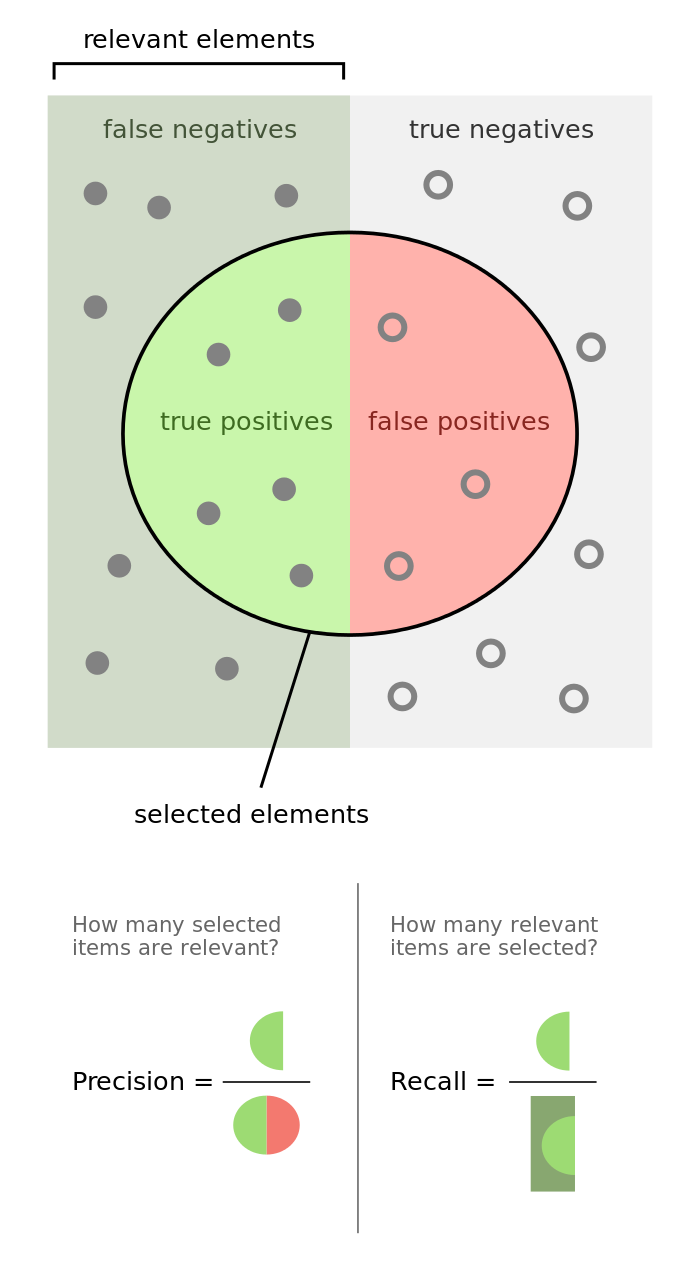

In [8]:
# Disabling Convergence and User warnings
simplefilter("ignore", category=ConvergenceWarning)
simplefilter("ignore", category=UserWarning)

for m in models:
    print('Running '+ m + ' model...')
    y_pred = cross_val_predict(models[m], X_train, y_train, cv=5)
    print(classification_report(y_train, y_pred))
    print(confusion_matrix(y_train,y_pred))
    print('Finished running.')
    print('')

Running Logistic regression model...
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33172
           1       0.64      0.59      0.62        54

    accuracy                           1.00     33226
   macro avg       0.82      0.80      0.81     33226
weighted avg       1.00      1.00      1.00     33226

Finished running.

Running SVM model...
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33172
           1       0.00      0.00      0.00        54

    accuracy                           1.00     33226
   macro avg       0.50      0.50      0.50     33226
weighted avg       1.00      1.00      1.00     33226

Finished running.

Running KNN model...
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33172
           1       0.00      0.00      0.00        54

    accuracy                           1.00     33226
   macro av